<a href="https://colab.research.google.com/github/girinath18/aadhaar-cardDetection/blob/master/DL_Project_3_Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [3]:
# Kaggle api
!kaggle datasets download -d girinathrs211555/aadhaar

Dataset URL: https://www.kaggle.com/datasets/girinathrs211555/aadhaar
License(s): unknown
100% 2.05G/2.05G [00:38<00:00, 80.7MB/s]
100% 2.05G/2.05G [00:38<00:00, 56.5MB/s]


In [4]:
!ls

aadhaar.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/aadhaar.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/AC'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  5000


Printing the name of images

In [7]:
file_names = os.listdir('/content/AC/')
print(file_names)

['cat (985).jpg', 'cat (303).jpeg', 'cat (1207).jpg', 'cat (1116).jpg', 'dogs (374).jpg', 'dogs (185).jpg', 'cat (149).jpg', 'dogs (717).png', 'cat (967).jpeg', 'dog (74).jpg', 'dogs (680).png', 'dogs (240).png', 'cat (253).jpg', 'cat (266).jpg', 'cat (1201).jpg', 'dog (79).jpg', 'cat (808).jpeg', 'cat (770).jpg', 'dogs (1008).png', 'cat (154).jpg', 'cat (594).jpeg', 'cat (968).jpg', 'cat (1042).jpeg', 'dogs (452).png', 'dog (314).jpg', 'cat (308).jpg', 'cat (721).jpeg', 'cat (301).jpg', 'cat (294).jpg', 'dogs (899).png', 'cat (1197).jpg', 'dogs (1237).png', 'cat (708).jpg', 'cat (1152).jpeg', 'cat (308).jpeg', 'dogs (133).png', 'dog (23).jpg', 'dog (149).jpg', 'dogs (43).png', 'cat (561).jpeg', 'dogs (724).png', 'dogs (8).png', 'cat (975).jpg', 'dogs (350).png', 'cat (575).jpg', 'cat (548).jpeg', 'cat (450).jpg', 'cat (711).jpg', 'dog (253).jpg', 'cat (1142).jpeg', 'dog (363).jpg', 'cat (248).jpeg', 'cat (1036).jpg', 'dogs (1351).png', 'cat (898).jpg', 'dog (236).jpg', 'cat (555).jpg'

Importing the Dependencies

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

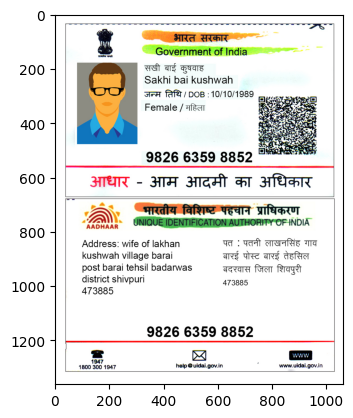

In [78]:
# display dog image
img = mpimg.imread('/content/AC/dog (18).jpg')
imgplt = plt.imshow(img)
plt.show()

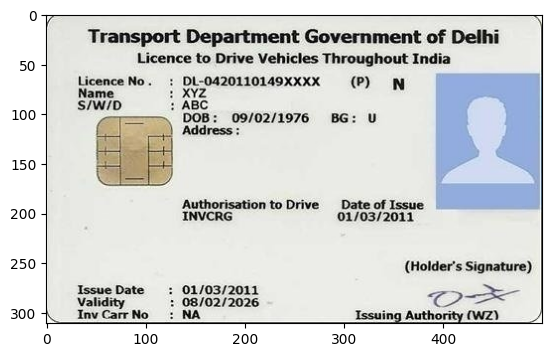

In [79]:
# display cat image
img = mpimg.imread('/content/AC/cat (194).jpg')
imgplt = plt.imshow(img)
plt.show()

In [80]:
file_names = os.listdir('/content/AC/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
cat
cat
cat
dog


In [81]:
file_names = os.listdir('/content/AC/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 2500
Number of cat images = 2500


Resizing all the images

In [82]:
#creating a directory for resized images
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [83]:
original_folder = '/content/AC/'
resized_folder = '/content/image resized/'

for i in range(1492):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

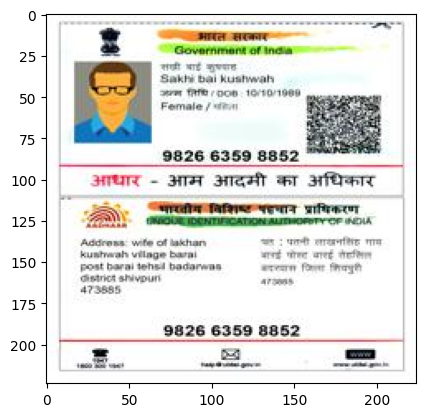

In [84]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog (100).jpg')
imgplt = plt.imshow(img)
plt.show()

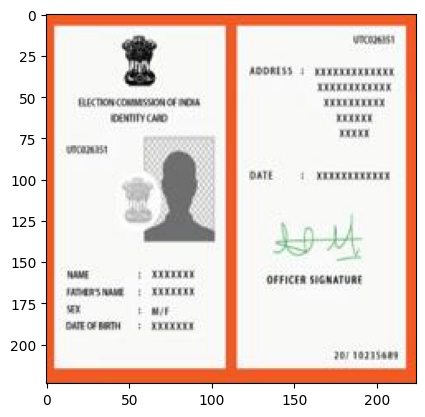

In [85]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat (996).jpeg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [86]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(1492):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [87]:
print(filenames[0:5])
print(len(filenames))

['cat (985).jpg', 'cat (303).jpeg', 'cat (1207).jpg', 'cat (1116).jpg', 'dogs (374).jpg']
2000


In [88]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 1]
1492


In [89]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[752 740]


Converting all the resized images to numpy arrays

In [90]:
import cv2
import glob

In [91]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [92]:
print(dog_cat_images)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [93]:
type(dog_cat_images)

numpy.ndarray

In [94]:
print(dog_cat_images.shape)

(1492, 224, 224, 3)


In [95]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [97]:
print(X.shape, X_train.shape, X_test.shape)

(1492, 224, 224, 3) (1193, 224, 224, 3) (299, 224, 224, 3)


1600 --> training images

400 --> test images

In [98]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [99]:
print(X_train_scaled)

[[[[0.50196078 0.49803922 0.48235294]
   [1.         1.         0.98823529]
   [1.         1.         1.        ]
   ...
   [0.01176471 0.01176471 0.01176471]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.48627451 0.4745098  0.45882353]
   [1.         1.         0.98823529]
   [0.99215686 0.99607843 0.98823529]
   ...
   [0.74117647 0.74117647 0.74117647]
   [0.7372549  0.7372549  0.7372549 ]
   [0.72941176 0.72941176 0.72941176]]

  [[0.50196078 0.48627451 0.46666667]
   [1.         1.         0.98823529]
   [0.99215686 0.99607843 0.98039216]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.3254902  0.31764706 0.34117647]
   [0.61960784 0.61568627 0.63137255]
   [0.62352941 0.61176471 0.61960784]
   ...
   [0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]]

  [[0.         0.         0.03137255]
   [0.0

**Building the Neural Network**

In [100]:
import tensorflow as tf
import tensorflow_hub as hub

In [101]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [102]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [103]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [108]:
model.fit(X_train_scaled, Y_train, epochs=15)

Epoch 1/15
38/38 [==============================] - 2s 41ms/step - loss: 0.7249 - acc: 0.4719
Epoch 2/15
38/38 [==============================] - 2s 41ms/step - loss: 0.7163 - acc: 0.4845
Epoch 3/15
38/38 [==============================] - 2s 40ms/step - loss: 0.7081 - acc: 0.4987
Epoch 4/15
38/38 [==============================] - 2s 40ms/step - loss: 0.7092 - acc: 0.4786
Epoch 5/15
38/38 [==============================] - 2s 40ms/step - loss: 0.7284 - acc: 0.4853
Epoch 6/15
38/38 [==============================] - 2s 42ms/step - loss: 0.7180 - acc: 0.4686
Epoch 7/15
38/38 [==============================] - 2s 42ms/step - loss: 0.7077 - acc: 0.5163
Epoch 8/15
38/38 [==============================] - 2s 47ms/step - loss: 0.7193 - acc: 0.4728
Epoch 9/15
38/38 [==============================] - 2s 44ms/step - loss: 0.7127 - acc: 0.4954
Epoch 10/15
38/38 [==============================] - 2s 41ms/step - loss: 0.7199 - acc: 0.5038
Epoch 11/15
38/38 [==============================] - 2s 41m

In [109]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

10/10 [==============================] - 0s 39ms/step - loss: 0.8069 - acc: 0.4716
Test Loss = 0.8068739771842957
Test Accuracy = 0.4715718924999237


**Predictive System**

Path of the image to be predicted: /content/Capture.PNG


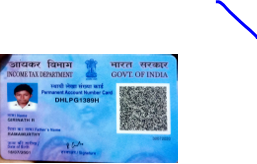

1/1 [==============================] - 0s 40ms/step
[[-0.6717944 -1.186613 ]]
0
The image represents a Cat


In [76]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
'''
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

'''

In [110]:
# prompt: give me the command to save the .h5 file

model.save('Ace.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
